In [2]:
import pandas as pd
import numpy as np
import random
from typing import List, Callable
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, minmax_scale, scale
from sklearn.metrics import confusion_matrix, log_loss, mean_squared_error
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from scipy.special import softmax
from sklearn.utils import shuffle

In [3]:
df = pd.read_csv("D:\\perturbation_on_chip_learning\\Perturbation-techniques-in-CNNs\\data\\Iris.csv")

In [4]:
y = df.Species.replace({"Iris-setosa" : 0, "Iris-virginica" : 1, "Iris-versicolor":2})
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: int64

In [5]:
Xn = df.iloc[:, 1:5]
Xn

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

In [6]:
yn = df.Species.replace({"Iris-setosa" : 0, "Iris-virginica" : 1, "Iris-versicolor":2})
yn = yn.to_numpy()
yn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [7]:
Xn = df.iloc[:, 1:5]
Xn = Xn.to_numpy()
Xn.shape

(150, 4)

In [8]:
Xn = minmax_scale(Xn, feature_range=(0, 1), copy=False)
Xn

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [9]:
x_train, x_val, y_train, y_val = train_test_split(Xn, yn, test_size=0.1, random_state=42) #split the data into train and validation

In [10]:
x_train = x_train.T #take the transpose of the training data m*784 -> 784*m
x_val = x_val.T #take the transpose of the test data m*784 -> 784*m
print(x_train.shape, x_val.shape)

(4, 135) (4, 15)


In [11]:
def params_init(seed=2):

  np.random.seed(seed)
  W1 = np.random.rand(50,4) - 0.5
  b1 = np.random.rand(50,1) - 0.5
  W2 = np.random.rand(3,50) - 0.5 
  b2 = np.random.rand(3,1) - 0.5 
  print("Params Initialised")

  return (W1, b1, W2, b2)

In [12]:

def predictions(A):
  #argmax returns the index of maximum value, we will feed the sigmoid output to this function 
  return np.argmax(A,0)


def accuracy(A,Y):
  #this will compare the predicted output to the ground truth
  return np.sum(A == Y)/(Y.shape[0])*100

In [13]:
def relu(x):
   return np.maximum(x,0)


def softmax(Z):
  #return np.exp(Z) / np.sum(np.exp(Z),0)
  Z = Z-np.max(Z, axis=0)
  return np.exp(Z) / np.sum(np.exp(Z),0)


def relu_d(x):
  return x>0

def one_hot_encoding(y):
  shape = (y.shape[0], 3)
  one_hot = np.zeros(shape)
  rows = np.arange(y.size)
  one_hot[rows, y] = 1
  return one_hot.T

def crossEntropy(y,y_pre):
  loss=-np.sum(np.multiply(y, np.log(y_pre + 10e-16)), axis = 0)
  return loss

In [14]:
def forward(x_train, W1, b1, W2, b2):
  #print("Entered FP")
  Z1 = np.matmul(W1,x_train) + b1 #W1 is 50*784, x_train is 748*m, Z1 is 50*m
  A1 = relu(Z1)

  Z2 = np.matmul(W2,A1) + b2
  A2 = softmax(Z2)
  

  return Z1, A1, Z2, A2

In [15]:
def param_update(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):

  #updates the parameters based on backpropogation

  W1 = W1 - lr*dW1
  b1 = b1 - lr*(db1.reshape(b1.shape))
  W2 = W2 - lr*dW2
  b2 = b2 - lr*(db2.reshape(b2.shape))


  return W1, b1, W2, b2

In [16]:
def backprop(Z1, A1, Z2, A2, W1, W2, X, y):
  m = y.shape[0] #m is the number of training examples
  Y = one_hot_encoding(y)

  dZ2 = (A2 - Y)
  
  dW2 = 1/m*np.matmul(dZ2,A1.T)

  db2 = 1/m*np.sum(dZ2, axis=1)

  dZ1 = np.matmul(W2.T, dZ2)*relu_d(Z1) #W2 is 10*50, dZ2 = 10*m, dZ1 = 50*m

  dW1 = 1/m*np.matmul(dZ1,X.T) #shape of dZ1 is 50*m, X is 784*m, dW1 = 50*784

  db1 = 1/m*np.sum(dZ1, axis=1) #db1 is 50*1


  return dW1, db1, dW2, db2

In [17]:
def batch_grad_descent(X,Y,iter, lr, print_op=1):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  weightsDict = {}

  W1, b1, W2, b2 = params_init()
  #print(W1)
  #gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3, gaussian_W4, gaussian_b4, gaussian_W5, gaussian_b5 = Gaussian_init (mu, sigma)
  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0




    for j in range(1): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
      #X1, Y1 = shuffle(X[:, j*15: (j+1)*15].T,Y[j*15: (j+1)*15]) #shuffle each batch
      #X1 = X1.T #take transpose to match the sizes
      X1, Y1 = X, Y

      Z1, A1, Z2, A2 = forward(X1, W1, b1, W2, b2) 

      dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X1, Y1)


      W1, b1, W2, b2 = param_update(W1, b1, W2, b2,  dW1, db1, dW2, db2,  lr = lr)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      _, _, _,  A2_train = forward(X, W1, b1, W2, b2)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A2_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _,   A2_val = forward(x_val, W1, b1, W2, b2)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A2_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')
      # plt.figure()
      # plt.hist(W1.flatten())

  return W1, b1, W2, b2, train_acc, val_acc, train_loss, val_loss, sum_weights


In [18]:
_, _, _, _, train_accBP, val_accBP, train_loss, val_loss, sum_weights = batch_grad_descent(x_train,y_train,iter=200, lr=0.001, print_op=20);

Params Initialised
Iteration: 20
Train accuracy: 41.48148148148148
Val accuracy: 46.666666666666664
Iteration: 40
Train accuracy: 45.925925925925924
Val accuracy: 46.666666666666664
Iteration: 60
Train accuracy: 48.148148148148145
Val accuracy: 46.666666666666664
Iteration: 80
Train accuracy: 52.59259259259259
Val accuracy: 53.333333333333336
Iteration: 100
Train accuracy: 56.2962962962963
Val accuracy: 53.333333333333336
Iteration: 120
Train accuracy: 57.77777777777777
Val accuracy: 73.33333333333333
Iteration: 140
Train accuracy: 60.74074074074074
Val accuracy: 73.33333333333333
Iteration: 160
Train accuracy: 63.70370370370371
Val accuracy: 73.33333333333333
Iteration: 180
Train accuracy: 65.18518518518519
Val accuracy: 73.33333333333333
Iteration: 200
Train accuracy: 68.88888888888889
Val accuracy: 73.33333333333333


In [19]:
def WP(W1, b1, W2, b2, pert, lossBeforePert, X, y):
    m = y.shape[0] #m is the number of training examples
    Y = one_hot_encoding(y)
    dW1 = np.zeros_like(W1)
    lossAfterPertW1 = np.zeros_like(W1)
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            W1pert = W1.copy()
            W1pert[i, j] += pert
            _, _, _, A2pert = forward(X, W1pert, b1, W2, b2)
            lossAfterPertW1[i, j] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
    dW1 = 1/m * (lossAfterPertW1-lossBeforePert)/pert


    db1 = np.zeros_like(b1)
    lossAfterPertb1 = np.zeros_like(b1)
    for i in range(b1.shape[0]):
        b1pert = b1.copy()
        b1pert[i]+=pert
        _, _, _, A2pert = forward(X, W1, b1pert, W2, b2)
        lossAfterPertb1[i] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
    db1 = 1/m * (lossAfterPertb1-lossBeforePert)/pert

    
    dW2 = np.zeros_like(W2)
    lossAfterPertW2 = np.zeros_like(W2)
    for i in range(W2.shape[0]):
        for j in range(W2.shape[1]):
            W2pert = W2.copy()
            W2pert[i, j] += pert
            _, _, _, A2pert = forward(X, W1, b1, W2pert, b2)
            lossAfterPertW2[i, j] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
    dW2 = 1/m * (lossAfterPertW2-lossBeforePert)/pert


    db2 = np.zeros_like(b2)
    lossAfterPertb2 = np.zeros_like(b2)
    for i in range(b2.shape[0]):
        b2pert = b2.copy()
        b2pert[i]+=pert
        _, _, _, A2pert = forward(X, W1, b1, W2, b2pert)
        lossAfterPertb2[i] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
    db2 = 1/m * (lossAfterPertb2-lossBeforePert)/pert

    return dW1, db1, dW2, db2
            

In [20]:
def batch_grad_descentWP(X,Y,iter, lr, pert, print_op=1):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  weightsDict = {}


  W1, b1, W2, b2 = params_init()
  #print(W1)
  #gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3, gaussian_W4, gaussian_b4, gaussian_W5, gaussian_b5 = Gaussian_init (mu, sigma)
  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0




    for j in range(1): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
      #X1, Y1 = shuffle(X[:, j*15: (j+1)*15].T,Y[j*15: (j+1)*15]) #shuffle each batch
      X1, Y1 = X, Y
      #X1 = X1.T #take transpose to match the sizes

      Z1, A1, Z2, A2 = forward(X1, W1, b1, W2, b2) 
      print(f"BP Iter {i+1} -> sub iter {j} : {accuracy(predictions(A2), Y1)}", end = "\r", flush = True)

      #dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X1, Y1)
      loss = np.sum(crossEntropy(one_hot_encoding(Y1), A2))
      dW1, db1, dW2, db2 = WP(W1, b1, W2, b2, pert=pert, lossBeforePert=loss, X=X1, y=Y1)


      W1, b1, W2, b2 = param_update(W1, b1, W2, b2,  dW1, db1, dW2, db2,  lr = lr)


    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      _, _, _,  A2_train = forward(X, W1, b1, W2, b2)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A2_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _,   A2_val = forward(x_val, W1, b1, W2, b2)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A2_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, train_acc, val_acc, train_loss, val_loss, sum_weights


In [21]:
batch_grad_descentWP(x_train,y_train,iter=200, lr=0.001, pert=0.001, print_op=1);

Params Initialised
Iteration: 1 sub iter 0 : 32.592592592592595
Train accuracy: 37.77777777777778
Val accuracy: 33.33333333333333
Iteration: 2 sub iter 0 : 37.77777777777778
Train accuracy: 35.55555555555556
Val accuracy: 20.0
Iteration: 3 sub iter 0 : 35.55555555555556
Train accuracy: 34.81481481481482
Val accuracy: 20.0
Iteration: 4 sub iter 0 : 34.81481481481482
Train accuracy: 34.81481481481482
Val accuracy: 20.0
Iteration: 5 sub iter 0 : 34.81481481481482
Train accuracy: 34.81481481481482
Val accuracy: 20.0
Iteration: 6 sub iter 0 : 34.81481481481482
Train accuracy: 37.03703703703704
Val accuracy: 33.33333333333333
Iteration: 7 sub iter 0 : 37.03703703703704
Train accuracy: 66.66666666666666
Val accuracy: 60.0
Iteration: 8 sub iter 0 : 66.66666666666666
Train accuracy: 67.4074074074074
Val accuracy: 60.0
Iteration: 9 sub iter 0 : 67.4074074074074
Train accuracy: 67.4074074074074
Val accuracy: 60.0
Iteration: 10 sub iter 0 : 67.4074074074074
Train accuracy: 67.4074074074074
Val acc

In [45]:
pertList = [1, 0.01, 0.001, 0.001]
trainAccWP = []
valAccWP = []
for pert in pertList:
    _, _, _, _, train_acc, val_acc, train_loss, val_loss, sum_weights = batch_grad_descentWP(x_train,y_train,100, 0.01, pert = pert, print_op=1);
    trainAccWP.append(train_acc)
    valAccWP.append(val_acc)

Params Initialised
Iteration: 1 sub iter 0 : 35.55555555555556
Train accuracy: 38.51851851851852
Val accuracy: 40.0
Iteration: 2 sub iter 0 : 38.51851851851852
Train accuracy: 41.48148148148148
Val accuracy: 46.666666666666664
Iteration: 3 sub iter 0 : 41.48148148148148
Train accuracy: 42.96296296296296
Val accuracy: 46.666666666666664
Iteration: 4 sub iter 0 : 42.96296296296296
Train accuracy: 46.666666666666664
Val accuracy: 46.666666666666664
Iteration: 5 sub iter 0 : 46.666666666666664
Train accuracy: 48.148148148148145
Val accuracy: 46.666666666666664
Iteration: 6 sub iter 0 : 48.148148148148145
Train accuracy: 48.888888888888886
Val accuracy: 53.333333333333336
Iteration: 7 sub iter 0 : 48.888888888888886
Train accuracy: 52.59259259259259
Val accuracy: 53.333333333333336
Iteration: 8 sub iter 0 : 52.59259259259259
Train accuracy: 54.81481481481482
Val accuracy: 53.333333333333336
Iteration: 9 sub iter 0 : 54.81481481481482
Train accuracy: 55.55555555555556
Val accuracy: 53.333333

Text(0.5, 1.0, 'Accuracy vs epochs for different techiques')

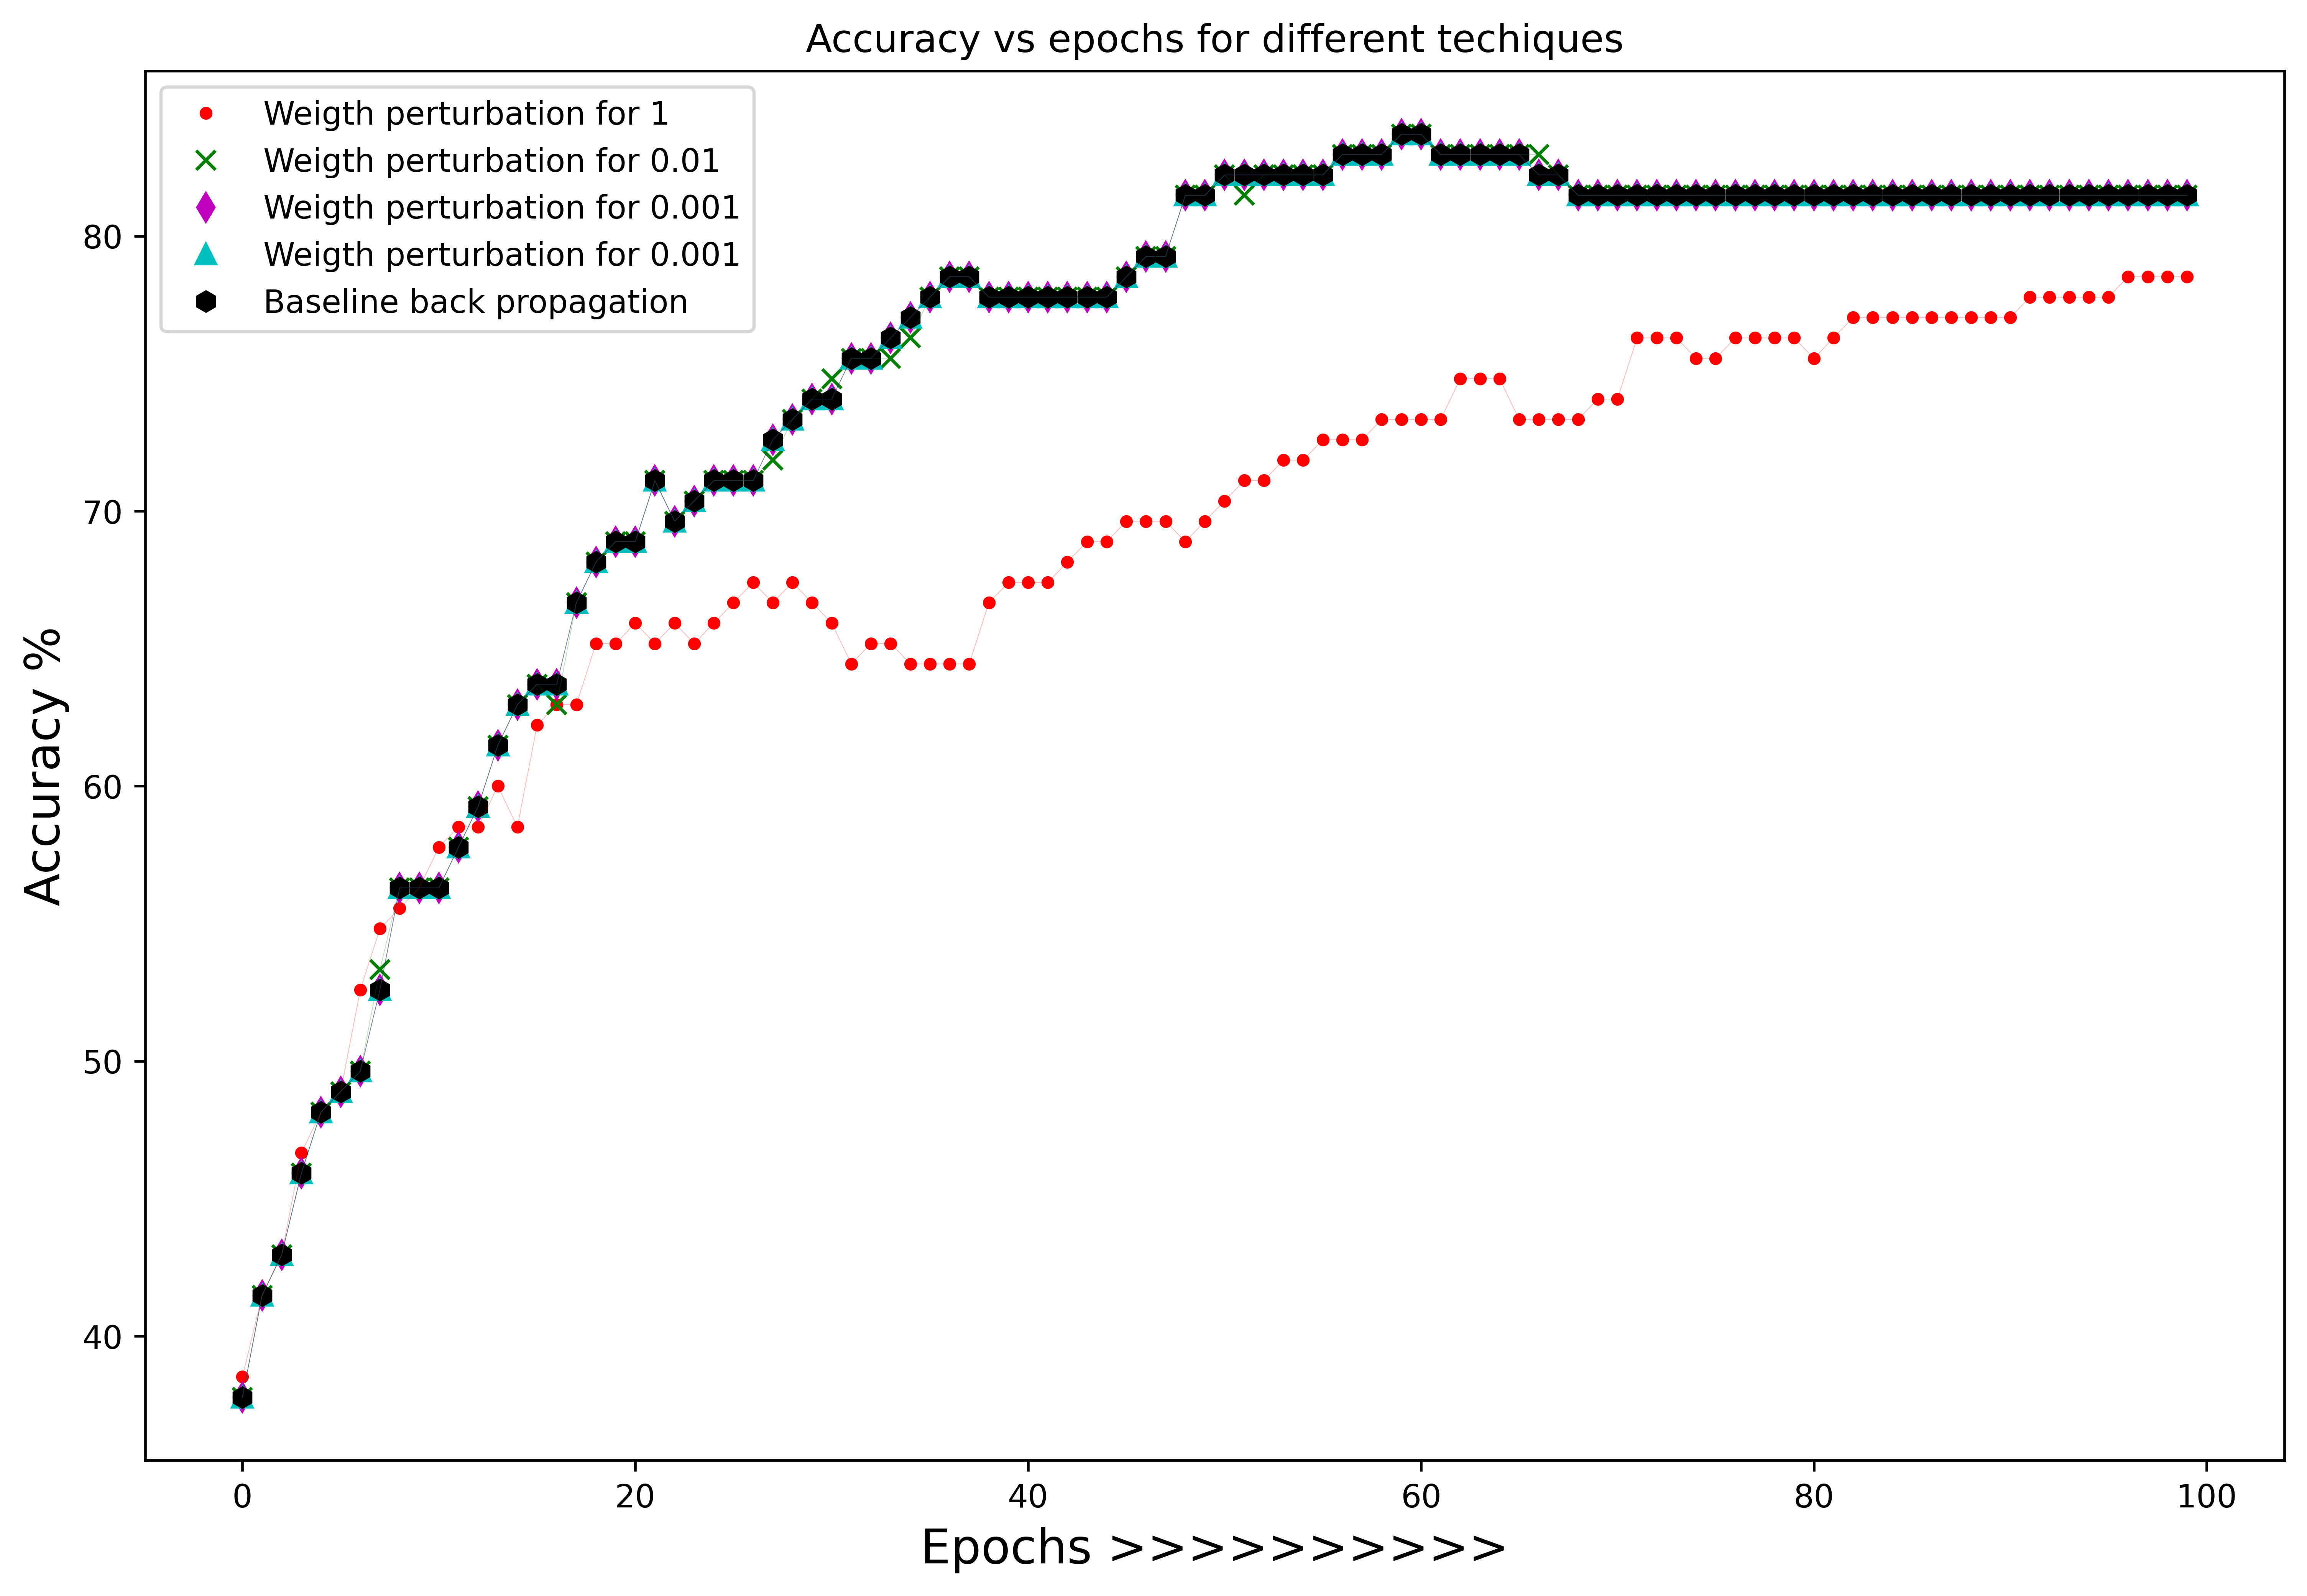

In [46]:
plt.rcParams['figure.dpi'] = 600
plt.figure(figsize=(12, 8))
format = ['r.', 'gx', 'md', 'c^']
col = ['r', 'g', 'm', 'c']
leg = []
for _ in range(len(pertList)):
    plt.plot(trainAccWP[_], format[_])
    leg.append(f"Weigth perturbation for {pertList[_]}")
plt.plot(train_accBP, 'kh')
leg.append("Baseline back propagation")
for _ in range(len(pertList)):
    plt.plot(trainAccWP[_], col[_], linewidth=0.2, alpha = 0.3)
plt.plot(train_accBP, 'k', linewidth=0.2, alpha = 0.3)
plt.legend(leg)
plt.xlabel("Epochs >>>>>>>>>>", size = 15)
plt.ylabel("Accuracy %", size = 15)
plt.title("Accuracy vs epochs for different techiques")

## Adding variabilty

### Generic functions related to variability

In [21]:
#helps in rounding to the nearest integer multiples of the chosen 'step' value!
#add clipping here
# def roundArbitrary(weightArray, step):
#   weightArrayDiv = weightArray / step
#   weightArrayDiv = np.round(weightArrayDiv)
#   return weightArrayDiv*step
def roundArbitrary(weightArray, step, wRange):#updates function with clipping
    #wRange is added for the clipping component 

    weightArrayDiv = np.clip(weightArray, a_min = -wRange, a_max = wRange)
    weightArrayDiv = weightArrayDiv / step
    weightArrayDiv = np.round(weightArrayDiv)
    return weightArrayDiv*step

In [22]:
def getVth(mu, sigma, shape):
  #last dimension represents the binary rep for each weight
  print(shape)
  return np.random.normal(loc=mu, scale=sigma, size=shape) #each bit is represented by an sram so we need those many vth values for each mosfet in this set

In [23]:
def initMosParam(shape, mu, sigma, vDD, precision, k=100):
    #modelling both Ion and Ioff  = I0*exp(Vgs-Vth/(eta*kB*T)),
    dim1, dim2 = shape
    sizeI = (dim1, dim2, precision)
    I0On = 1e+06
    I0Off = I0On/k
    #eta = 
    #kB = 1.3806452e10-23
    #T = 300
    VT = 0.026*1.5#should be eqaul to eta x kB x T

    #Vth = getVth(mu, sigma, sizeI)#get the array of Vth values 
    Vth = np.random.normal(loc=mu, scale=sigma, size = sizeI)
    Vth[Vth<=0] = 10e-10

    #iOn = ((vDD - Vth)**2)*I0On#scaling the current according to Ioff values arbitraryfor now!!
    iOn = I0On * np.exp((0 - Vth)/(VT))
    #iOn = I0On * np.ones_like(Vth)



    #iOnNominal = 1e-06*(vDD**2 - (2*vDD*mu) + (sigma**2  + mu**2))
    iOnNominal = np.sum(iOn)/(dim1*dim2*precision)
    #Vth = np.random.normal(loc=mu, scale=sigma, size = sizeI)
    #iOff = np.random.uniform(low=0, high=1e-8, size = sizeI)#no negative value
    iOff = I0Off * np.exp((0 - Vth)/(VT))
    #iOff = I0Off * np.ones_like(Vth)
    return (iOn, iOnNominal, iOff)

In [24]:
def clippedWeight(weightArray, precision, step, discreteSteps):
    return np.multiply(np.sign(weightArray), np.digitize(np.abs(weightArray), discreteSteps))*step

In [25]:
def weightTransformWithVariability(weightArray, currents, precision, step, discreteSteps, wRange):
  dim1, dim2 = weightArray.shape
  sizeI = (dim1, dim2, precision)

  #clippedWeightIndexArray = np.digitize(np.abs(weightArray), discreteSteps) #finds the index value of the weights
  #updating the above to the actual round function.
  clippedWeightIndexArray = (roundArbitrary(weightArray, step, wRange)/step).astype(np.int64)
  clippedWeightIndexArray = np.abs(clippedWeightIndexArray)

  #vDD = 5
  #mu = 0.7#mean of the distribution
  #sigma = 0.00001
  #! work with sigma/mu
  
  iOn, iOnNominal, iOff = currents

  
  analogWeightArray = np.zeros_like(weightArray, dtype=float)

  for bitLevel in range(precision):
    analogWeightArray +=  np.where(np.bitwise_and(clippedWeightIndexArray, 2**bitLevel)>=1, iOn[:, :, bitLevel], iOff[:, :, bitLevel]) * (2**bitLevel)

  
  analogWeightArray  = np.multiply(np.sign(weightArray), analogWeightArray)

  weightWithVariability = (analogWeightArray/iOnNominal)*step
  return weightWithVariability

In [26]:
# refer to https://stackoverflow.com/questions/9958506/element-wise-string-concatenation-in-numpy

## NEED TO CORRECT IT FOR A NEGATIVE VALUES OF THE WEIGHT ARRAY!!!!
def weigthBitArray(weightArray, precision, discreteSteps):
    clippedWeightIndexArray = np.digitize(np.abs(weightArray), discreteSteps) #finds the index value of the weights

    iniArr = np.where(np.bitwise_and(clippedWeightIndexArray, 2**0)>=1, '1', '0') #array of bits at level 0 (2^0)

    for j in range(1, precision):
        iniArr = np.core.defchararray.add(np.where(np.bitwise_and(clippedWeightIndexArray, 2**j)>=1, '1', '0'), iniArr)
    return iniArr

In [26]:
dis = [(-1)*i for i in discreteSteps[::-1]] + discreteSteps

NameError: name 'discreteSteps' is not defined

In [27]:
def createLookUpTable2d(weightArray, currents, precision, step, discreteSteps, wRange):
    dis = [(-1)*i for i in discreteSteps[::-1]] + discreteSteps
    finalLookUp = np.zeros((weightArray.shape[0], weightArray.shape[1], len(dis)))
    k = 0
    for i in dis:
        maskee = np.ones_like(weightArray, dtype = float)*i
        maskeeTransformed  = weightTransformWithVariability(maskee, currents, precision, step, discreteSteps, wRange)
        finalLookUp[:, :, k] += maskeeTransformed
        k +=1
    return finalLookUp 

In [28]:
def nearest(lookUpDiff, weightUpdate):
    # W1new = W1  + dW1
    # we want to compare and find W1new such that W1new-(W1+dW1) has least deviation!!!
    # We look at L1 error and take the minimum of this!
    idx = np.argmin(np.abs(lookUpDiff - weightUpdate[:,:,None]), axis = 2)
    return idx

In [29]:
def findNextWeight(lookUp, lookUpDiff, weightUpdate):
    idx = np.indices(nearest(lookUpDiff, weightUpdate).shape)
    #discrete lookup needs to be used
    return lookUp[idx[0],idx[1],nearest(lookUpDiff, weightUpdate)]

In [30]:
def findNextState(disArr, lookUpDiff, weightUpdate):
    return disArr[nearest(lookUpDiff, weightUpdate)]

In [31]:
mu = 0.7
sigma = 0.01
vDD = 5
precision = 4#setting the precision value of the calculations
wRange = 1
noOfLevels = 2**precision - 1 #no of levels of quantization
#step = round(wRange/noOfLevels, precision)
step =  wRange/noOfLevels#step size of each of the step after quantization
#discreteSteps = [round(step*i, precision) for i in range(0, noOfLevels)] #storing the values of the steps
discreteSteps = [step*i for i in range(0, noOfLevels)] #storing the values of the steps

In [84]:
discreteSteps

[0.0,
 0.06666666666666667,
 0.13333333333333333,
 0.2,
 0.26666666666666666,
 0.3333333333333333,
 0.4,
 0.4666666666666667,
 0.5333333333333333,
 0.6,
 0.6666666666666666,
 0.7333333333333333,
 0.8,
 0.8666666666666667,
 0.9333333333333333]

In [104]:
findNextState(disArr, b- a[:,:,None], f)

array([[0.8       , 0.93333333, 0.66666667],
       [0.6       , 0.93333333, 0.2       ],
       [0.2       , 0.06666667, 0.73333333]])

In [85]:
a = np.random.rand(3,3) 
a

array([[0.93984764, 0.94367957, 0.39605181],
       [0.55341634, 0.49074831, 0.48743812],
       [0.49910035, 0.39314878, 0.56397486]])

In [86]:
f = np.random.rand(3,3) - 0.5
f

array([[-0.3065127 ,  0.1445059 ,  0.40170736],
       [-0.03977702,  0.28319756, -0.24293973],
       [-0.27632461, -0.32316673,  0.11683958]])

In [87]:
f[:,:,None]

array([[[-0.3065127 ],
        [ 0.1445059 ],
        [ 0.40170736]],

       [[-0.03977702],
        [ 0.28319756],
        [-0.24293973]],

       [[-0.27632461],
        [-0.32316673],
        [ 0.11683958]]])

In [88]:
b[0,0,:]

array([-0.99210212, -0.98784319, -0.98381625, -0.98064558, -0.97661864,
       -0.97235972, -0.96833278, -0.96519734, -0.9611704 , -0.95691147,
       -0.95288453, -0.94971387, -0.94568693, -0.941428  , -0.93740106,
       -0.93327764, -0.92925069, -0.92499177, -0.92096483, -0.91779416,
       -0.91376722, -0.9095083 , -0.90548136, -0.90234592, -0.89831898,
       -0.89406005, -0.89003311, -0.88686245, -0.88283551, -0.87857658,
       -0.87454964, -0.86881485, -0.86478791, -0.86052899, -0.85650205,
       -0.85333138, -0.84930444, -0.84504552, -0.84101857, -0.83788314,
       -0.8338562 , -0.82959727, -0.82557033, -0.82239967, -0.81837272,
       -0.8141138 , -0.81008686, -0.80596343, -0.80193649, -0.79767757,
       -0.79365063, -0.79047996, -0.78645302, -0.78219409, -0.77816715,
       -0.77503172, -0.77100478, -0.76674585, -0.76271891, -0.75954825,
       -0.7555213 , -0.75126238, -0.74723544, -0.74736257, -0.74333562,
       -0.7390767 , -0.73504976, -0.73187909, -0.72785215, -0.72

In [89]:
currents = initMosParam((3, 3), mu, sigma, vDD, precision, k =onoff)#k = Ion/Ioff
b = createLookUpTable2d(a, currents, precision, step, discreteSteps, wRange)
b

array([[[-0.82360607, -0.72339447, -0.67452133, -0.53306303,
         -0.4841899 , -0.38397829, -0.33510515, -0.53746131,
         -0.48858817, -0.38837656, -0.33950343, -0.19804513,
         -0.14917199, -0.04896039,  0.        ,  0.        ,
          0.04896039,  0.14917199,  0.19804513,  0.33950343,
          0.38837656,  0.48858817,  0.53746131,  0.33510515,
          0.38397829,  0.4841899 ,  0.53306303,  0.67452133,
          0.72339447,  0.82360607],
        [-0.86895388, -0.79919581, -0.75195619, -0.64230251,
         -0.59506289, -0.52530482, -0.4780652 , -0.43821992,
         -0.3909803 , -0.32122223, -0.27398261, -0.16432894,
         -0.11708931, -0.04733124,  0.        ,  0.        ,
          0.04733124,  0.11708931,  0.16432894,  0.27398261,
          0.32122223,  0.3909803 ,  0.43821992,  0.4780652 ,
          0.52530482,  0.59506289,  0.64230251,  0.75195619,
          0.79919581,  0.86895388],
        [-1.0160566 , -0.94847479, -0.85645183, -0.8571802 ,
         -0.7

In [97]:
b.shape

(3, 3, 30)

In [90]:
np.abs(b - a[:,:,None] -f[:,:,None])

array([[[1.45694102, 1.35672941, 1.30785627, 1.16639798, 1.11752484,
         1.01731323, 0.9684401 , 1.17079626, 1.12192312, 1.02171151,
         0.97283837, 0.83138008, 0.78250694, 0.68229533, 0.63333495,
         0.63333495, 0.58437456, 0.48416295, 0.43528981, 0.29383152,
         0.24495838, 0.14474677, 0.09587364, 0.2982298 , 0.24935666,
         0.14914505, 0.10027191, 0.04118638, 0.09005952, 0.19027113],
        [1.95713935, 1.88738128, 1.84014166, 1.73048799, 1.68324836,
         1.61349029, 1.56625067, 1.5264054 , 1.47916577, 1.40940771,
         1.36216808, 1.25251441, 1.20527478, 1.13551672, 1.08818547,
         1.08818547, 1.04085423, 0.97109616, 0.92385654, 0.81420286,
         0.76696324, 0.69720517, 0.64996555, 0.61012028, 0.56288065,
         0.49312259, 0.44588296, 0.33622929, 0.28898966, 0.2192316 ],
        [1.81381577, 1.74623397, 1.654211  , 1.65493937, 1.56291641,
         1.49533461, 1.40331165, 1.30039706, 1.2083741 , 1.1407923 ,
         1.04876933, 1.0494977 ,

In [91]:
nearest(lookUpDiff = b - a[:,:,None], weightUpdate = f)

array([[27, 29, 25],
       [24, 29, 18],
       [18, 16, 26]], dtype=int64)

In [100]:
disArr = np.array(dis)
disArr

array([-0.93333333, -0.86666667, -0.8       , -0.73333333, -0.66666667,
       -0.6       , -0.53333333, -0.46666667, -0.4       , -0.33333333,
       -0.26666667, -0.2       , -0.13333333, -0.06666667, -0.        ,
        0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
        0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
        0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333])

In [102]:
disArr[nearest(lookUpDiff = b - a[:,:,None], weightUpdate = f)]

array([[0.8       , 0.93333333, 0.66666667],
       [0.6       , 0.93333333, 0.2       ],
       [0.2       , 0.06666667, 0.73333333]])

In [262]:
##CORRECT CODE!!!!!!!!!!!!!!!
idx = np.indices(nearest(lookUpDiff = b - a[:,:,None], weightUpdate = f).shape)
C = b[idx[0],idx[1], nearest(lookUpDiff = b - a[:,:,None], weightUpdate = f)]
C

array([[0.64406398],
       [1.05336483],
       [0.52273829]])

In [103]:
findNextState(disArr, b- a[:,:,None], f)

array([[0.8       , 0.93333333, 0.66666667],
       [0.6       , 0.93333333, 0.2       ],
       [0.2       , 0.06666667, 0.73333333]])

In [235]:
idx

array([[[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]],

       [[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]])

In [166]:
val_arr = np.arange(27).reshape(3,3,3)
z_indices = np.array([[1,0,2],
                      [0,0,1],
                      [2,0,1]])
val_arr

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [170]:
z_indices.choose(val_arr)

array([[ 9,  1, 20],
       [ 3,  4, 14],
       [24,  7, 17]])

In [43]:
def batch_grad_descentBPVar(X,Y,iter, lr, mu, sigma, vDD, precision, step, discreteSteps, wRange, onoff,print_op=1):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  weightsDict = {}

  # mu = 1
  # sigma = 0.4

  W1, b1, W2, b2 = params_init(None)
  W1 = roundArbitrary(W1, step, wRange)#weights have to maintained as their digitized versions
  b1 = roundArbitrary(b1, step, wRange)
  W2 = roundArbitrary(W2, step, wRange)
  b2 = roundArbitrary(b2, step, wRange)

  disArr = np.array([(-1)*i for i in discreteSteps[::-1]] + discreteSteps)
  
  W1Currents = initMosParam((50, 4), mu, sigma, vDD, precision, k =onoff)#k = Ion/Ioff
  b1Currents = initMosParam((50, 1), mu, sigma, vDD, precision, k =onoff)
  W2Currents = initMosParam((3, 50) ,mu, sigma, vDD, precision, k =onoff)
  b2Currents = initMosParam((3, 1), mu, sigma, vDD, precision, k =onoff)



  W1lookUp = createLookUpTable2d(W1, W1Currents, precision, step, discreteSteps, wRange)
  b1lookUp = createLookUpTable2d(b1, b1Currents, precision, step, discreteSteps, wRange)
  W2lookUp = createLookUpTable2d(W2, W2Currents, precision, step, discreteSteps, wRange)
  b2lookUp = createLookUpTable2d(b2, b2Currents, precision, step, discreteSteps, wRange)


  #print(W1)
  #gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3, gaussian_W4, gaussian_b4, gaussian_W5, gaussian_b5 = Gaussian_init (mu, sigma)
  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0




    for j in range(1): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
      #X1, Y1 = shuffle(X[:, j*15: (j+1)*15].T,Y[j*15: (j+1)*15]) #shuffle each batch
      #X1 = X1.T #take transpose to match the sizes
      X1, Y1 = X, Y

      W1varoc = weightTransformWithVariability(W1, W1Currents, precision, step, discreteSteps, wRange)
      b1varoc = weightTransformWithVariability(b1, b1Currents, precision, step, discreteSteps, wRange)
      W2varoc = weightTransformWithVariability(W2, W2Currents, precision, step, discreteSteps, wRange)
      b2varoc = weightTransformWithVariability(b2, b2Currents, precision, step, discreteSteps, wRange)

      Z1, A1, Z2, A2 = forward(X1, W1varoc, b1varoc, W2varoc, b2varoc) 

      dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1varoc, W2varoc, X1, Y1)


      #W1, b1, W2, b2 = param_update(W1, b1, W2, b2,  dW1, db1, dW2, db2,  lr = lr)
      W1 = findNextState(disArr, W1lookUp - W1varoc[:,:,None], (-1)*lr*dW1)
      b1 = findNextState(disArr, b1lookUp - b1varoc[:,:,None], (-1)*lr*db1.reshape((50,1)))
      W2 = findNextState(disArr, W2lookUp - W2varoc[:,:,None], (-1)*lr*dW2)
      b2 = findNextState(disArr, b2lookUp - b2varoc[:,:,None], (-1)*lr*db2.reshape((3,1)))

      # W1 = roundArbitrary(W1, step, wRange)#weights have to maintained as their digitized versions
      # b1 = roundArbitrary(b1, step, wRange)
      # W2 = roundArbitrary(W2, step, wRange)
      # b2 = roundArbitrary(b2, step, wRange)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      W1varoc = weightTransformWithVariability(W1, W1Currents, precision, step, discreteSteps, wRange)
      b1varoc = weightTransformWithVariability(b1, b1Currents, precision, step, discreteSteps, wRange)
      W2varoc = weightTransformWithVariability(W2, W2Currents, precision, step, discreteSteps, wRange)
      b2varoc = weightTransformWithVariability(b2, b2Currents, precision, step, discreteSteps, wRange)
      _, _, _,  A2_train = forward(X, W1varoc, b1varoc, W2varoc, b2varoc)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A2_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _,   A2_val = forward(x_val, W1varoc, b1varoc, W2varoc, b2varoc)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A2_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')
    

  return W1, b1, W2, b2, train_acc, val_acc, train_loss, val_loss, sum_weights


In [64]:
mu = 0.7
sigma = 0.01
vDD = 5
precision = 10#setting the precision value of the calculations
wRange = 1
noOfLevels = 2**precision - 1 #no of levels of quantization
#step = round(wRange/noOfLevels, precision)
step =  wRange/noOfLevels#step size of each of the step after quantization
#discreteSteps = [round(step*i, precision) for i in range(0, noOfLevels)] #storing the values of the steps
discreteSteps = [step*i for i in range(0, noOfLevels)] #storing the values of the steps
onoff = 10000
iter=200
lr=0.1

In [66]:
_, _, _, _, train_accBP, val_accBP, train_loss, val_loss, sum_weights  = batch_grad_descentBPVar(x_train,y_train,iter, lr, mu, sigma, vDD, precision, step, discreteSteps, wRange, onoff,print_op=1)

Params Initialised
Iteration: 1
Train accuracy: 37.03703703703704
Val accuracy: 26.666666666666668
Iteration: 2
Train accuracy: 40.74074074074074
Val accuracy: 26.666666666666668
Iteration: 3
Train accuracy: 48.148148148148145
Val accuracy: 46.666666666666664
Iteration: 4
Train accuracy: 52.59259259259259
Val accuracy: 46.666666666666664
Iteration: 5
Train accuracy: 54.81481481481482
Val accuracy: 46.666666666666664
Iteration: 6
Train accuracy: 58.51851851851851
Val accuracy: 46.666666666666664
Iteration: 7
Train accuracy: 62.22222222222222
Val accuracy: 53.333333333333336
Iteration: 8
Train accuracy: 64.44444444444444
Val accuracy: 60.0
Iteration: 9
Train accuracy: 65.18518518518519
Val accuracy: 60.0
Iteration: 10
Train accuracy: 66.66666666666666
Val accuracy: 60.0
Iteration: 11
Train accuracy: 66.66666666666666
Val accuracy: 60.0
Iteration: 12
Train accuracy: 66.66666666666666
Val accuracy: 60.0
Iteration: 13
Train accuracy: 66.66666666666666
Val accuracy: 60.0
Iteration: 14
Train 

In [97]:
finalTrainAcc = []
finalValAcc = []
for _ in range(0, 100):
    _, _, _, _, train_accBP, val_accBP, train_loss, val_loss, sum_weights  = batch_grad_descentBPVar(x_train,y_train,iter, lr, mu, sigma, vDD, precision, step, discreteSteps, wRange, onoff,print_op=1)
    finalTrainAcc.append(train_accBP[-1])
    finalValAcc.append(val_accBP[-1])

Params Initialised
Iteration: 1
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 2
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 3
Train accuracy: 2.9629629629629632
Val accuracy: 6.666666666666667
Iteration: 4
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 5
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 6
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 7
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 8
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 9
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 10
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 11
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 12
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 13
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 14
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 15
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 16
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 17
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 18
Train accuracy: 0.0
Val accuracy: 0.0
Iteration: 19
Train accur

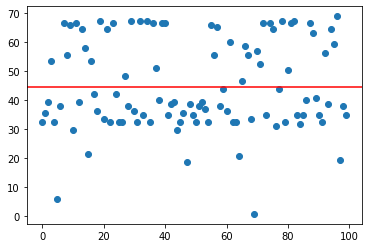

In [103]:
# Train accuracy: 44.44444444444444
# Val accuracy: 26.666666666666668
plt.plot(np.array(finalTrainAcc), 'o' )
plt.axhline(44.44444444444444, color = 'r')

# WP with var

In [35]:
def WPwithVarUp(W1, b1, W2, b2, pert, lossBeforePert, X, y, precision, step, discreteSteps, wRange,  W1Var, b1Var, W2Var, b2Var, W1Currents, b1Currents, W2Currents, b2Currents):
    #assert pert==step #to get increments of '1' in the bit pattern of the weight array
    #!here we chnage perturb only one value
    m = y.shape[0] #m is the number of training examples
    Y = one_hot_encoding(y)
    dW1 = np.zeros_like(W1)
    lossAfterPertW1 = np.zeros_like(W1)
    
    W1pert = W1.copy()
    W1pert += pert
    W1pertArrTr = weightTransformWithVariability(W1pert, W1Currents, precision, step, discreteSteps, wRange)
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            W1pertLoop = W1Var.copy()
            W1pertLoop[i, j] = W1pertArrTr[i, j]
            #print(W1pertLoop - W1Var)
            #plt.figure()
            #plt.plot(W1Var.flatten(), W1pertLoop.flatten(), '.')
            #plt.title("W1 comp")
            #do the transform only on that perturbed weight and place it in the correct place
            #W1pertArrTr = weightTransformWithVariability(W1pert, W1Currents, precision, step, discreteSteps, wRange)
            _, _, _, A2pert = forward(X, W1pertLoop, b1Var, W2Var, b2Var)
            #print(A2pert)
            lossAfterPertW1[i, j] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
            dW1[i, j] = 1/m * (np.sum(crossEntropy(one_hot_encoding(y), A2pert))-lossBeforePert)/(W1pertArrTr[i,j] - W1Var[i,j]+ 10e-16)
    #dW1 = 1/m * (lossAfterPertW1-lossBeforePert)/pert
    #print(lossAfterPertW1-lossBeforePert)


    db1 = np.zeros_like(b1)
    lossAfterPertb1 = np.zeros_like(b1)

    b1pert = b1.copy()
    b1pert +=pert
    b1pertArrTr = weightTransformWithVariability(b1pert, b1Currents, precision, step, discreteSteps, wRange)

    for i in range(b1.shape[0]):
        b1pertLoop = b1Var.copy()
        b1pertLoop[i]=b1pertArrTr[i]
        #b1pertArrTr = weightTransformWithVariability(b1pert, b1Currents, precision, step, discreteSteps, wRange)
        _, _, _, A2pert = forward(X, W1Var, b1pertLoop, W2Var, b2Var)
        lossAfterPertb1[i] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
        db1[i] = 1/m * (np.sum(crossEntropy(one_hot_encoding(y), A2pert))-lossBeforePert)/(b1pertArrTr[i] - b1Var[i] + 10e-16)
    #db1 = 1/m * (lossAfterPertb1-lossBeforePert)/pert

    
    dW2 = np.zeros_like(W2)
    lossAfterPertW2 = np.zeros_like(W2)

    W2pert = W2.copy()
    W2pert += pert
    W2pertArrTr = weightTransformWithVariability(W2pert, W2Currents, precision, step, discreteSteps, wRange)

    for i in range(W2.shape[0]):
        for j in range(W2.shape[1]):
            W2pertLoop = W2Var.copy()
            W2pertLoop[i, j] = W2pertArrTr[i, j]
            #W2pertArrTr = weightTransformWithVariability(W2pert, W2Currents, precision, step, discreteSteps, wRange)
            _, _, _, A2pert = forward(X, W1Var, b1Var, W2pertLoop, b2Var)
            lossAfterPertW2[i, j] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
            dW2[i, j] = 1/m * (np.sum(crossEntropy(one_hot_encoding(y), A2pert))-lossBeforePert)/(W2pertArrTr[i,j] - W2Var[i,j]+ 10e-16)
    #dW2 = 1/m * (lossAfterPertW2-lossBeforePert)/pert
    #print(lossAfterPertW2)


    db2 = np.zeros_like(b2)
    lossAfterPertb2 = np.zeros_like(b2)

    b2pert = b2.copy()
    b2pert += pert
    b2pertArrTr = weightTransformWithVariability(b2pert, b2Currents, precision, step, discreteSteps, wRange)


    for i in range(b2.shape[0]):
        b2pertLoop = b2Var.copy()
        b2pertLoop[i] = b2pertArrTr[i]
        #b2pertArrTr = weightTransformWithVariability(b2pert, b2Currents, precision, step, discreteSteps, wRange)
        _, _, _, A2pert = forward(X, W1Var, b1Var, W2Var, b2pertLoop)
        lossAfterPertb2[i] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
        db2[i] = 1/m * (np.sum(crossEntropy(one_hot_encoding(y), A2pert))-lossBeforePert)/(b2pertArrTr[i] - b2Var[i]+ 10e-16)

    #db2 = 1/m * (lossAfterPertb2-lossBeforePert)/pert

    return dW1, db1, dW2, db2
            

In [36]:
def WP(W1, b1, W2, b2, pert, lossBeforePert, X, y):
    m = y.shape[0] #m is the number of training examples
    Y = one_hot_encoding(y)
    dW1 = np.zeros_like(W1)
    lossAfterPertW1 = np.zeros_like(W1)
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            W1pert = W1.copy()
            W1pert[i, j] += pert
            _, _, _, A2pert = forward(X, W1pert, b1, W2, b2)
            lossAfterPertW1[i, j] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
    dW1 = 1/m * (lossAfterPertW1-lossBeforePert)/pert


    db1 = np.zeros_like(b1)
    lossAfterPertb1 = np.zeros_like(b1)
    for i in range(b1.shape[0]):
        b1pert = b1.copy()
        b1pert[i]+=pert
        _, _, _, A2pert = forward(X, W1, b1pert, W2, b2)
        lossAfterPertb1[i] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
    db1 = 1/m * (lossAfterPertb1-lossBeforePert)/pert

    
    dW2 = np.zeros_like(W2)
    lossAfterPertW2 = np.zeros_like(W2)
    for i in range(W2.shape[0]):
        for j in range(W2.shape[1]):
            W2pert = W2.copy()
            W2pert[i, j] += pert
            _, _, _, A2pert = forward(X, W1, b1, W2pert, b2)
            lossAfterPertW2[i, j] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
    dW2 = 1/m * (lossAfterPertW2-lossBeforePert)/pert


    db2 = np.zeros_like(b2)
    lossAfterPertb2 = np.zeros_like(b2)
    for i in range(b2.shape[0]):
        b2pert = b2.copy()
        b2pert[i]+=pert
        _, _, _, A2pert = forward(X, W1, b1, W2, b2pert)
        lossAfterPertb2[i] = np.sum(crossEntropy(one_hot_encoding(y), A2pert))
    db2 = 1/m * (lossAfterPertb2-lossBeforePert)/pert

    return dW1, db1, dW2, db2
            

In [39]:
def batch_grad_descentWPVar(X,Y,iter, lr, pert, mu, sigma, vDD, precision, step, discreteSteps, wRange,print_op=1):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  weightsDict = {}


  W1, b1, W2, b2 = params_init(None)
  W1 = roundArbitrary(W1, step, wRange)#weights have to maintained as their digitized versions
  b1 = roundArbitrary(b1, step, wRange)
  W2 = roundArbitrary(W2, step, wRange)
  b2 = roundArbitrary(b2, step, wRange)


  W1Currents = initMosParam((50, 4), mu, sigma, vDD, precision, k =onoff)#k = Ion/Ioff
  b1Currents = initMosParam((50, 1), mu, sigma, vDD, precision, k =onoff)
  W2Currents = initMosParam((3, 50) ,mu, sigma, vDD, precision, k =onoff)
  b2Currents = initMosParam((3, 1), mu, sigma, vDD, precision, k =onoff)
  #print(W1)
  #gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3, gaussian_W4, gaussian_b4, gaussian_W5, gaussian_b5 = Gaussian_init (mu, sigma)
  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0




    for j in range(1): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
      #X1, Y1 = shuffle(X[:, j*15: (j+1)*15].T,Y[j*15: (j+1)*15]) #shuffle each batch
      X1, Y1 = X, Y
      #X1 = X1.T #take transpose to match the sizes

      W1varoc = weightTransformWithVariability(W1, W1Currents, precision, step, discreteSteps, wRange)
      b1varoc = weightTransformWithVariability(b1, b1Currents, precision, step, discreteSteps, wRange)
      W2varoc = weightTransformWithVariability(W2, W2Currents, precision, step, discreteSteps, wRange)
      b2varoc = weightTransformWithVariability(b2, b2Currents, precision, step, discreteSteps, wRange)

      Z1, A1, Z2, A2 = forward(X1, W1varoc, b1varoc, W2varoc, b2varoc) 
      print(f"WP Iter {i+1} -> sub iter {j} : {accuracy(predictions(A2), Y1)}", end = "\r", flush = True)

      #dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X1, Y1)
      loss = np.sum(crossEntropy(one_hot_encoding(Y1), A2))
      #dW1, db1, dW2, db2 = WP(W1, b1, W2, b2, pert=pert, lossBeforePert=loss, X=X1, y=Y1)
      dW1, db1, dW2, db2 = WPwithVarUp(W1, b1, W2, b2, pert, loss, X1, Y1, precision, step, discreteSteps, wRange,  W1varoc, b1varoc, W2varoc, b2varoc, W1Currents, b1Currents, W2Currents, b2Currents)


      W1, b1, W2, b2 = param_update(W1, b1, W2, b2,  dW1, db1, dW2, db2,  lr = lr)
      W1 = roundArbitrary(W1, step, wRange)#weights have to maintained as their digitized versions
      b1 = roundArbitrary(b1, step, wRange)
      W2 = roundArbitrary(W2, step, wRange)
      b2 = roundArbitrary(b2, step, wRange)


    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')
      W1varoc = weightTransformWithVariability(W1, W1Currents, precision, step, discreteSteps, wRange)
      b1varoc = weightTransformWithVariability(b1, b1Currents, precision, step, discreteSteps, wRange)
      W2varoc = weightTransformWithVariability(W2, W2Currents, precision, step, discreteSteps, wRange)
      b2varoc = weightTransformWithVariability(b2, b2Currents, precision, step, discreteSteps, wRange)

      #obtain training loss
      _, _, _,  A2_train = forward(X, W1varoc, b1varoc, W2varoc, b2varoc)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A2_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _,   A2_val = forward(x_val, W1varoc, b1varoc, W2varoc, b2varoc)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A2_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, train_acc, val_acc, train_loss, val_loss, sum_weights


In [38]:
_, _, _, _, train_acc, val_acc, train_loss, val_loss, sum_weights = batch_grad_descentWPVar(x_train,y_train,iter=200, lr=0.001, pert = step, mu  = mu, sigma = sigma, vDD = vDD, precision = precision, step= step , discreteSteps=discreteSteps, wRange=wRange,print_op=1)

Params Initialised


ValueError: operands could not be broadcast together with shapes (50,4) (100,4) (100,4) 

In [115]:
finalTrainAccWP = []
finalValAccWP = []
for _ in range(0, 100):
    _, _, _, _, train_accBP, val_accBP, train_loss, val_loss, sum_weights  = batch_grad_descentWPVar(x_train,y_train,iter=200, lr=0.001, pert = step, mu  = mu, sigma = sigma, vDD = vDD, precision = precision, step= step , discreteSteps=discreteSteps, wRange=wRange,print_op=1)
    finalTrainAccWP.append(train_accBP[-1])
    finalValAccWP.append(val_accBP[-1])

Params Initialised
Iteration: 1 sub iter 0 : 32.592592592592595
Train accuracy: 32.592592592592595
Val accuracy: 40.0
Iteration: 2 sub iter 0 : 32.592592592592595
Train accuracy: 32.592592592592595
Val accuracy: 40.0
Iteration: 3 sub iter 0 : 32.592592592592595
Train accuracy: 32.592592592592595
Val accuracy: 40.0
Iteration: 4 sub iter 0 : 32.592592592592595
Train accuracy: 32.592592592592595
Val accuracy: 40.0
Iteration: 5 sub iter 0 : 32.592592592592595
Train accuracy: 32.592592592592595
Val accuracy: 40.0
Iteration: 6 sub iter 0 : 32.592592592592595
Train accuracy: 32.592592592592595
Val accuracy: 40.0
Iteration: 7 sub iter 0 : 32.592592592592595
Train accuracy: 32.592592592592595
Val accuracy: 40.0
Iteration: 8 sub iter 0 : 32.592592592592595
Train accuracy: 32.592592592592595
Val accuracy: 40.0
Iteration: 9 sub iter 0 : 32.592592592592595
Train accuracy: 32.592592592592595
Val accuracy: 40.0
Iteration: 10 sub iter 0 : 32.592592592592595
Train accuracy: 32.592592592592595
Val accur

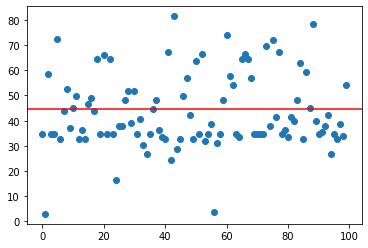

In [116]:
# Train accuracy: 44.44444444444444
# Val accuracy: 26.666666666666668
plt.plot(np.array(finalTrainAccWP), 'o' )
plt.axhline(44.44444444444444, color = 'r')

In [39]:
def batch_grad_descentCompWPBP(X,Y,iter, lr, mu, sigma, vDD, precision, step, discreteSteps, wRange, onoff,print_op=1):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []

  weightsDict = {}

  # mu = 1
  # sigma = 0.4

  W1, b1, W2, b2 = params_init()
  W1bp = roundArbitrary(W1, step, wRange)#weights have to maintained as their digitized versions
  b1bp = roundArbitrary(b1, step, wRange)
  W2bp = roundArbitrary(W2, step, wRange)
  b2bp = roundArbitrary(b2, step, wRange)

  W1wp = roundArbitrary(W1, step, wRange)#weights have to maintained as their digitized versions
  b1wp = roundArbitrary(b1, step, wRange)
  W2wp = roundArbitrary(W2, step, wRange)
  b2wp = roundArbitrary(b2, step, wRange)


  W1Currents = initMosParam((100, 4), mu, sigma, vDD, precision, k =onoff)#k = Ion/Ioff
  b1Currents = initMosParam((100, 1), mu, sigma, vDD, precision, k =onoff)
  W2Currents = initMosParam((3, 100) ,mu, sigma, vDD, precision, k =onoff)
  b2Currents = initMosParam((3, 1), mu, sigma, vDD, precision, k =onoff)
  #print(W1)
  #gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3, gaussian_W4, gaussian_b4, gaussian_W5, gaussian_b5 = Gaussian_init (mu, sigma)
  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0




    for j in range(1): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
      #X1, Y1 = shuffle(X[:, j*15: (j+1)*15].T,Y[j*15: (j+1)*15]) #shuffle each batch
      #X1 = X1.T #take transpose to match the sizes
      X1, Y1 = X, Y

      W1varoc = weightTransformWithVariability(W1, W1Currents, precision, step, discreteSteps, wRange)
      b1varoc = weightTransformWithVariability(b1, b1Currents, precision, step, discreteSteps, wRange)
      W2varoc = weightTransformWithVariability(W2, W2Currents, precision, step, discreteSteps, wRange)
      b2varoc = weightTransformWithVariability(b2, b2Currents, precision, step, discreteSteps, wRange)

      Z1, A1, Z2, A2 = forward(X1, W1varoc, b1varoc, W2varoc, b2varoc) 

      dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1varoc, W2varoc, X1, Y1)


      W1, b1, W2, b2 = param_update(W1, b1, W2, b2,  dW1, db1, dW2, db2,  lr = lr)
      W1 = roundArbitrary(W1, step, wRange)#weights have to maintained as their digitized versions
      b1 = roundArbitrary(b1, step, wRange)
      W2 = roundArbitrary(W2, step, wRange)
      b2 = roundArbitrary(b2, step, wRange)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training loss
      W1varoc = weightTransformWithVariability(W1, W1Currents, precision, step, discreteSteps, wRange)
      b1varoc = weightTransformWithVariability(b1, b1Currents, precision, step, discreteSteps, wRange)
      W2varoc = weightTransformWithVariability(W2, W2Currents, precision, step, discreteSteps, wRange)
      b2varoc = weightTransformWithVariability(b2, b2Currents, precision, step, discreteSteps, wRange)
      _, _, _,  A2_train = forward(X, W1varoc, b1varoc, W2varoc, b2varoc)
      #for i in range(0, Y.shape[0]):
       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A2_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _,   A2_val = forward(x_val, W1varoc, b1varoc, W2varoc, b2varoc)
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A2_val), y_val)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')
    

  return W1, b1, W2, b2, train_acc, val_acc, train_loss, val_loss, sum_weights


In [40]:
def batchGDCompOCUp(X,Y,iter, lr, pert, mu, sigma, vDD, precision, step, discreteSteps, wRange, print_op=1):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  n = Y.shape[0]
  train_acc = []
  val_acc = []
  sum_weights = []
  train_loss = []
  val_loss = []
  w1Sim = []
  b1Sim = []
  w2Sim = []
  b2Sim = []
  w3Sim = []
  b3Sim = []
  W1comp = []

  W1, b1, W2, b2 = params_init(None)

  W1bp, b1bp, W2bp, b2bp= W1.copy(), b1.copy(), W2.copy(), b2.copy()
  #W1bp, b1bp, W2bp, b2bp, W3bp, b3bp =params_init()
  W1bp = roundArbitrary(W1bp, step, wRange)#weights have to maintained as their digitized versions
  b1bp = roundArbitrary(b1bp, step, wRange)
  W2bp = roundArbitrary(W2bp, step, wRange)
  b2bp = roundArbitrary(b2bp, step, wRange)
  

  W1wp, b1wp, W2wp, b2wp = W1.copy(), b1.copy(), W2.copy(), b2.copy()
  #W1np, b1np, W2np, b2np, W3np, b3np = params_init()
  W1wp = roundArbitrary(W1wp, step, wRange)#weights have to maintained as their digitized versions
  b1wp = roundArbitrary(b1wp, step, wRange)
  W2wp = roundArbitrary(W2wp, step, wRange)
  b2wp = roundArbitrary(b2wp, step, wRange)


  W1Currents = initMosParam((50, 4), mu, sigma, vDD, precision, k =onoff)#k = Ion/Ioff
  b1Currents = initMosParam((50, 1), mu, sigma, vDD, precision, k =onoff)
  W2Currents = initMosParam((3, 50) ,mu, sigma, vDD, precision, k =onoff)
  b2Currents = initMosParam((3, 1), mu, sigma, vDD, precision, k =onoff)

  W1lookUp = createLookUpTable2d(W1, W1Currents, precision, step, discreteSteps, wRange)
  b1lookUp = createLookUpTable2d(b1, b1Currents, precision, step, discreteSteps, wRange)
  W2lookUp = createLookUpTable2d(W2, W2Currents, precision, step, discreteSteps, wRange)
  b2lookUp = createLookUpTable2d(b2, b2Currents, precision, step, discreteSteps, wRange)

  disArr = np.array([(-1)*i for i in discreteSteps[::-1]] + discreteSteps)




  #print(W1)
  #gaussian_W1, gaussian_b1, gaussian_W2, gaussian_b2, gaussian_W3, gaussian_b3, gaussian_W4, gaussian_b4, gaussian_W5, gaussian_b5 = Gaussian_init (mu, sigma)



  for i in range(iter): #loop over 
    train_loss_score = 0
    val_loss_score = 0

    for j in range(1): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 63000, batch size = 630
      # X1, Y1 = shuffle(X[:, j*630: (j+1)*630].T,Y[j*630: (j+1)*630]) #shuffle each batch
      # X1 = X1.T #take transpose to match the sizes
      X1, Y1 = X, Y

      
      W1varocwp = weightTransformWithVariability(W1wp, W1Currents, precision, step, discreteSteps, wRange)
      b1varocwp = weightTransformWithVariability(b1wp, b1Currents, precision, step, discreteSteps, wRange)
      W2varocwp = weightTransformWithVariability(W2wp, W2Currents, precision, step, discreteSteps, wRange)
      b2varocwp = weightTransformWithVariability(b2wp, b2Currents, precision, step, discreteSteps, wRange)

      #W1comp.append([W1np[0, 0], W1varocwp[0, 0]])
      #plt.figure()
      #plt.plot(W1wp.flatten(), W1varocwp.flatten(), '.')
      #print(W1varocwp)
      #doing the weight perturbation pass first
      Z1, A1, Z2, A2 = forward(X1, W1varocwp, b1varocwp, W2varocwp,b2varocwp) 
      #print(A2)
      print(f"WP Iter {i} -> sub iter {j} : {round(accuracy(predictions(A2), Y1), 3)}", end = "\r", flush = True)
      #lossBeforePert = np.sum((A3-one_hot_encoding(Y1))**2, axis=0)
      lossBeforePert = np.sum(crossEntropy(one_hot_encoding(Y1), A2))


      #print(f"Main iter: {i} Sub iter : {j}\n")
      #dW1, db1, dW2, db2, dW3, db3 = backprop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X1, Y1)
      #dW1np, db1np, dW2np, db2np, dW3np, db3np = NP(pert, lossBeforePert, Z1, A1, Z2, A2, Z3, A3, W1varocnp, W2varocnp, W3varocnp,b1varocnp, b2varocnp, b3varocnp, X1, Y1)
      #print(f"iter in iter{j}")
      #dW1wp, db1wp, dW2wp, db2wp = WP(W1varocwp, b1varocwp, W2varocwp, b2varocwp, pert, lossBeforePert, X1, Y1)
      dW1wp, db1wp, dW2wp, db2wp = WPwithVarUp(W1wp, b1wp, W2wp, b2wp, pert, lossBeforePert, X1, Y1, precision, step, discreteSteps,  wRange, W1varocwp, b1varocwp, W2varocwp, b2varocwp, W1Currents, b1Currents, W2Currents, b2Currents)
      #print(dW1wp)
      #print(W1roundwp/step)

      # dW1roundwp = roundArbitrary(dW1wp, step, wRange)#weights have to maintained as their digitized versions
      # db1roundwp = roundArbitrary(db1wp, step, wRange)
      # dW2roundwp = roundArbitrary(dW2wp, step, wRange)
      # db2roundwp = roundArbitrary(db2wp, step, wRange)
      



      #W1wp, b1wp, W2wp, b2wp = param_update(W1wp, b1wp, W2wp,b2wp, dW1wp, db1wp, dW2wp, db2wp, lr = lr)



      W1wp = findNextState(disArr, W1lookUp - W1varocwp[:,:,None], (-1)*lr*dW1wp)
      b1wp = findNextState(disArr, b1lookUp - b1varocwp[:,:,None], (-1)*lr*db1wp.reshape((50,1)))
      W2wp = findNextState(disArr, W2lookUp - W2varocwp[:,:,None], (-1)*lr*dW2wp)
      b2wp = findNextState(disArr, b2lookUp - b2varocwp[:,:,None], (-1)*lr*db2wp.reshape((3,1)))



      W1wp = roundArbitrary(W1wp, step, wRange)#weights have to maintained as their digitized versions
      b1wp = roundArbitrary(b1wp, step, wRange)
      W2wp = roundArbitrary(W2wp, step, wRange)
      b2wp = roundArbitrary(b2wp, step, wRange)
      #print(dW1wp/step)
      #print(W1wp)
      ###print(f"Max W1={np.max(np.abs(W1np))},b1={np.max(np.abs(b1np))},W2={np.max(np.abs(W2np))},b2={np.max(np.abs(b2np))},W3={np.max(np.abs(W3np))},b3={np.max(np.abs(b3np))}", end= 'r', flush=True)




      #doing the back propagation for the same data set sample

      W1varocbp = weightTransformWithVariability(W1bp, W1Currents, precision, step, discreteSteps, wRange)
      b1varocbp = weightTransformWithVariability(b1bp, b1Currents, precision, step, discreteSteps, wRange)
      W2varocbp = weightTransformWithVariability(W2bp, W2Currents, precision, step, discreteSteps, wRange)
      b2varocbp = weightTransformWithVariability(b2bp, b2Currents, precision, step, discreteSteps, wRange)
      

      Z1, A1, Z2, A2 = forward(X1, W1varocbp, b1varocbp, W2varocbp,b2varocbp)
      #print(A2) 
      print(f"                                                                        BP Iter {i} -> sub iter {j} : {round(accuracy(predictions(A2), Y1),3)}", end = "\r", flush = True)
      #print(f"Main iter: {i} Sub iter : {j}\n")
      dW1bp, db1bp, dW2bp, db2bp = backprop(Z1, A1, Z2, A2, W1varocbp, W2varocbp, X1, Y1)
      #print(dW1bp)
      #print(f"iter in iter{j}")


      # dW1roundbp = roundArbitrary(dW1bp, step, wRange)#weights have to maintained as their digitized versions
      # db1roundbp = roundArbitrary(db1bp, step, wRange)
      # dW2roundbp = roundArbitrary(dW2bp, step, wRange)
      # db2roundbp = roundArbitrary(db2bp, step, wRange)


      # W1bp, b1bp, W2bp, b2bp = param_update(W1bp, b1bp, W2bp, b2bp, dW1bp, db1bp, dW2bp, db2bp,  lr = lr)

      W1bp = findNextState(disArr, W1lookUp - W1varocbp[:,:,None], (-1)*lr*dW1bp)
      b1bp = findNextState(disArr, b1lookUp - b1varocbp[:,:,None], (-1)*lr*db1bp.reshape((50,1)))
      W2bp = findNextState(disArr, W2lookUp - W2varocbp[:,:,None], (-1)*lr*dW2bp)
      b2bp = findNextState(disArr, b2lookUp - b2varocbp[:,:,None], (-1)*lr*db2bp.reshape((3,1)))

      W1bp = roundArbitrary(W1bp, step, wRange)#weights have to maintained as their digitized versions
      b1bp = roundArbitrary(b1bp, step, wRange)
      W2bp = roundArbitrary(W2bp, step, wRange)
      b2bp = roundArbitrary(b2bp, step, wRange)
      #plt.plot(dW1np.flatten(), dW1bp.flatten(), '.')
      #plt.xlabel("Weight updates from Node perturbation")
      #plt.ylabel("Weight updates from Back prop")
      #plt.show()
      # plt.figure()
      # plt.plot(dW1bp.flatten(), dW1wp.flatten(), '.')
      # plt.title(f"Iter {j}")
      #plt.plot(dW1roundbp.flatten(), dW1roundwp.flatten(), '.', alpha = 0.3)


    #lrNP = lrNP*np.exp(-0.1)
    #lrBP = lrBP*np.exp(-0.1)

    if (i+1)%(print_op) == 0:
      #print(f'\nIteration: {i + 1}')

      #obtain training loss
      # plt.figure()
      # plt.plot(W1bp.flatten())
      # plt.plot(W1wp.flatten())
      # plt.legend(["BP", "Wp"])
      _, _, _, A2_train = forward(X, weightTransformWithVariability(W1wp, W1Currents, precision, step, discreteSteps, wRange), weightTransformWithVariability(b1wp, b1Currents, precision, step, discreteSteps, wRange), weightTransformWithVariability(W2wp, W2Currents, precision, step, discreteSteps, wRange), weightTransformWithVariability(b2wp, b2Currents, precision, step, discreteSteps, wRange))
      _, _, _, A2_train_bp = forward(X, weightTransformWithVariability(W1bp, W1Currents, precision, step, discreteSteps, wRange), weightTransformWithVariability(b1bp, b1Currents, precision, step, discreteSteps, wRange), weightTransformWithVariability(W2bp, W2Currents, precision, step, discreteSteps, wRange), weightTransformWithVariability(b2bp, b2Currents, precision, step, discreteSteps, wRange))
      #for i in range(0, Y.shape[0]):

       # train_loss_score = train_loss_score + (-1*(np.log(A5_train[Y[i], i])))
      #train_loss.append(train_loss_score)
      #print(f'Train Loss: {train_loss_score}')

      #obtain training accuracy
      train_score = accuracy(predictions(A2_train), Y)
      train_acc.append([accuracy(predictions(A2_train_bp), Y), train_score])
      #print(f'Train accuracy: {train_score}')

      ##obtain validation loss
      _, _, _,  A2_val = forward(x_val, weightTransformWithVariability(W1wp, W1Currents, precision, step, discreteSteps, wRange), weightTransformWithVariability(b1wp, b1Currents, precision, step, discreteSteps, wRange), weightTransformWithVariability(W2wp, W2Currents, precision, step, discreteSteps, wRange), weightTransformWithVariability(b2wp, b2Currents, precision, step, discreteSteps, wRange))
      _, _, _, A2_val_bp = forward(x_val,  weightTransformWithVariability(W1bp, W1Currents, precision, step, discreteSteps, wRange), weightTransformWithVariability(b1bp, b1Currents, precision, step, discreteSteps, wRange), weightTransformWithVariability(W2bp, W2Currents, precision, step, discreteSteps, wRange), weightTransformWithVariability(b2bp, b2Currents, precision, step, discreteSteps, wRange))
      #for i in range(0, y_val.shape[0]):
       # val_loss_score = val_loss_score + (-1*(np.log(A5_val[y_val[i], i]))) 
      #val_loss.append(val_loss_score)
      #print(f'Validation Loss: {val_loss_score}')

      ##obtain validation accuracy
      val_score = accuracy(predictions(A2_val), y_val)
      val_acc.append([accuracy(predictions(A2_val_bp), y_val), val_score])
      #print(f'Val accuracy: {val_score}')
      print(f"Iteration: {i + 1}::Train accuracy WP: {round(train_score, 3)}::Val accuracy: {round(val_score, 3)}:#########################:Train Acc BP::{round(accuracy(predictions(A2_train_bp), Y), 3)} Val Acc BP::{round(accuracy(predictions(A2_val_bp), y_val), 3)}:: WPL : {np.sum(crossEntropy(one_hot_encoding(y_val), A2_val))}:: BPL: {np.sum(crossEntropy(one_hot_encoding(y_val), A2_val_bp))}")


      #obtain the sum of weights and append to the sum array
      #sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(W3)) + np.sum(abs(W4)) + np.sum(abs(W5)) + np.sum(abs(b1)) + np.sum(abs(b2)) + np.sum(abs(b3))  + np.sum(abs(b4)) + np.sum(abs(b5))
      #sum_weights.append(sum_w)
      #print(f'Sum of weights: {sum_w}')

  return train_acc, val_acc, train_loss, val_loss, sum_weights

In [41]:
mu = 0.7
sigma = 0.00001
#set sigma to 0.08
vDD = 5
precision = 10#setting the precision value of the calculations
wRange = 1
noOfLevels = 2**precision - 1 #no of levels of quantization
#step = round(wRange/noOfLevels, precision)
step =  wRange/noOfLevels#step size of each of the step after quantization
#discreteSteps = [round(step*i, precision) for i in range(0, noOfLevels)] #storing the values of the steps
discreteSteps = [step*i for i in range(0, noOfLevels)] #storing the values of the steps
onoff = 10000
iter=500
lr=0.01

In [42]:
train_acc, val_acc, train_loss, val_loss, sum_weights = batchGDCompOCUp(x_train,y_train,iter, lr, step, mu, sigma, vDD, precision, step, discreteSteps, wRange, print_op=20)

Params Initialised
Iteration: 20::Train accuracy WP: 32.593::Val accuracy: 40.0:#########################:Train Acc BP::32.593 Val Acc BP::40.0:: WPL : 15.491744447006495:: BPL: 15.491848130011329
Iteration: 40::Train accuracy WP: 40.0::Val accuracy: 40.0:#########################:Train Acc BP::40.0 Val Acc BP::40.0:: WPL : 14.794584878754097:: BPL: 14.792788669074952
Iteration: 60::Train accuracy WP: 61.481::Val accuracy: 53.333:#########################:Train Acc BP::61.481 Val Acc BP::53.333:: WPL : 14.286563161743466:: BPL: 14.286433512998473
Iteration: 80::Train accuracy WP: 66.667::Val accuracy: 60.0:#########################:Train Acc BP::66.667 Val Acc BP::60.0:: WPL : 13.874943935071698:: BPL: 13.87377010561433
Iteration: 100::Train accuracy WP: 66.667::Val accuracy: 60.0:#########################:Train Acc BP::66.667 Val Acc BP::60.0:: WPL : 13.52718093730872:: BPL: 13.52759039892807
Iteration: 120::Train accuracy WP: 67.407::Val accuracy: 60.0:#########################:Train

KeyboardInterrupt: 

In [1]:
lst1=[1,2,3,4] 
length=len(lst1)
print(length)

4


In [225]:
finTrainAccBP = []
finTrainAccWP = []
finValAccBP = []
finValAccWP = []

In [227]:
train_acc[-1]
for _ in range(0, 50):
    train_acc, val_acc, train_loss, val_loss, sum_weights = batchGDCompOCUp(x_train,y_train,iter, lr, step, mu, sigma, vDD, precision, step, discreteSteps, wRange, print_op=50)
    finTrainAccBP.append(train_acc[-1][0])
    finTrainAccWP.append(train_acc[-1][1])
    finValAccBP.append(train_acc[-1][0])
    finValAccWP.append(train_acc[-1][1])

Params Initialised
Iteration: 50::Train accuracy WP: 32.593::Val accuracy: 40.0:#########################:Train Acc BP::32.593 Val Acc BP::40.0:: WPL : 44.59066803274472:: BPL: 44.59063584846685
Iteration: 100::Train accuracy WP: 32.593::Val accuracy: 40.0:#########################:Train Acc BP::32.593 Val Acc BP::40.0:: WPL : 44.04022657194902:: BPL: 44.04025159807622
Iteration: 150::Train accuracy WP: 32.593::Val accuracy: 40.0:#########################:Train Acc BP::32.593 Val Acc BP::40.0:: WPL : 44.005807340475975:: BPL: 44.005807340475975
Iteration: 200::Train accuracy WP: 32.593::Val accuracy: 40.0:#########################:Train Acc BP::32.593 Val Acc BP::40.0:: WPL : 43.97905504903069:: BPL: 43.97905504903069
Iteration: 250::Train accuracy WP: 32.593::Val accuracy: 40.0:#########################:Train Acc BP::32.593 Val Acc BP::40.0:: WPL : 43.97905504903069:: BPL: 43.97905504903069
Iteration: 300::Train accuracy WP: 32.593::Val accuracy: 40.0:#########################:Train A

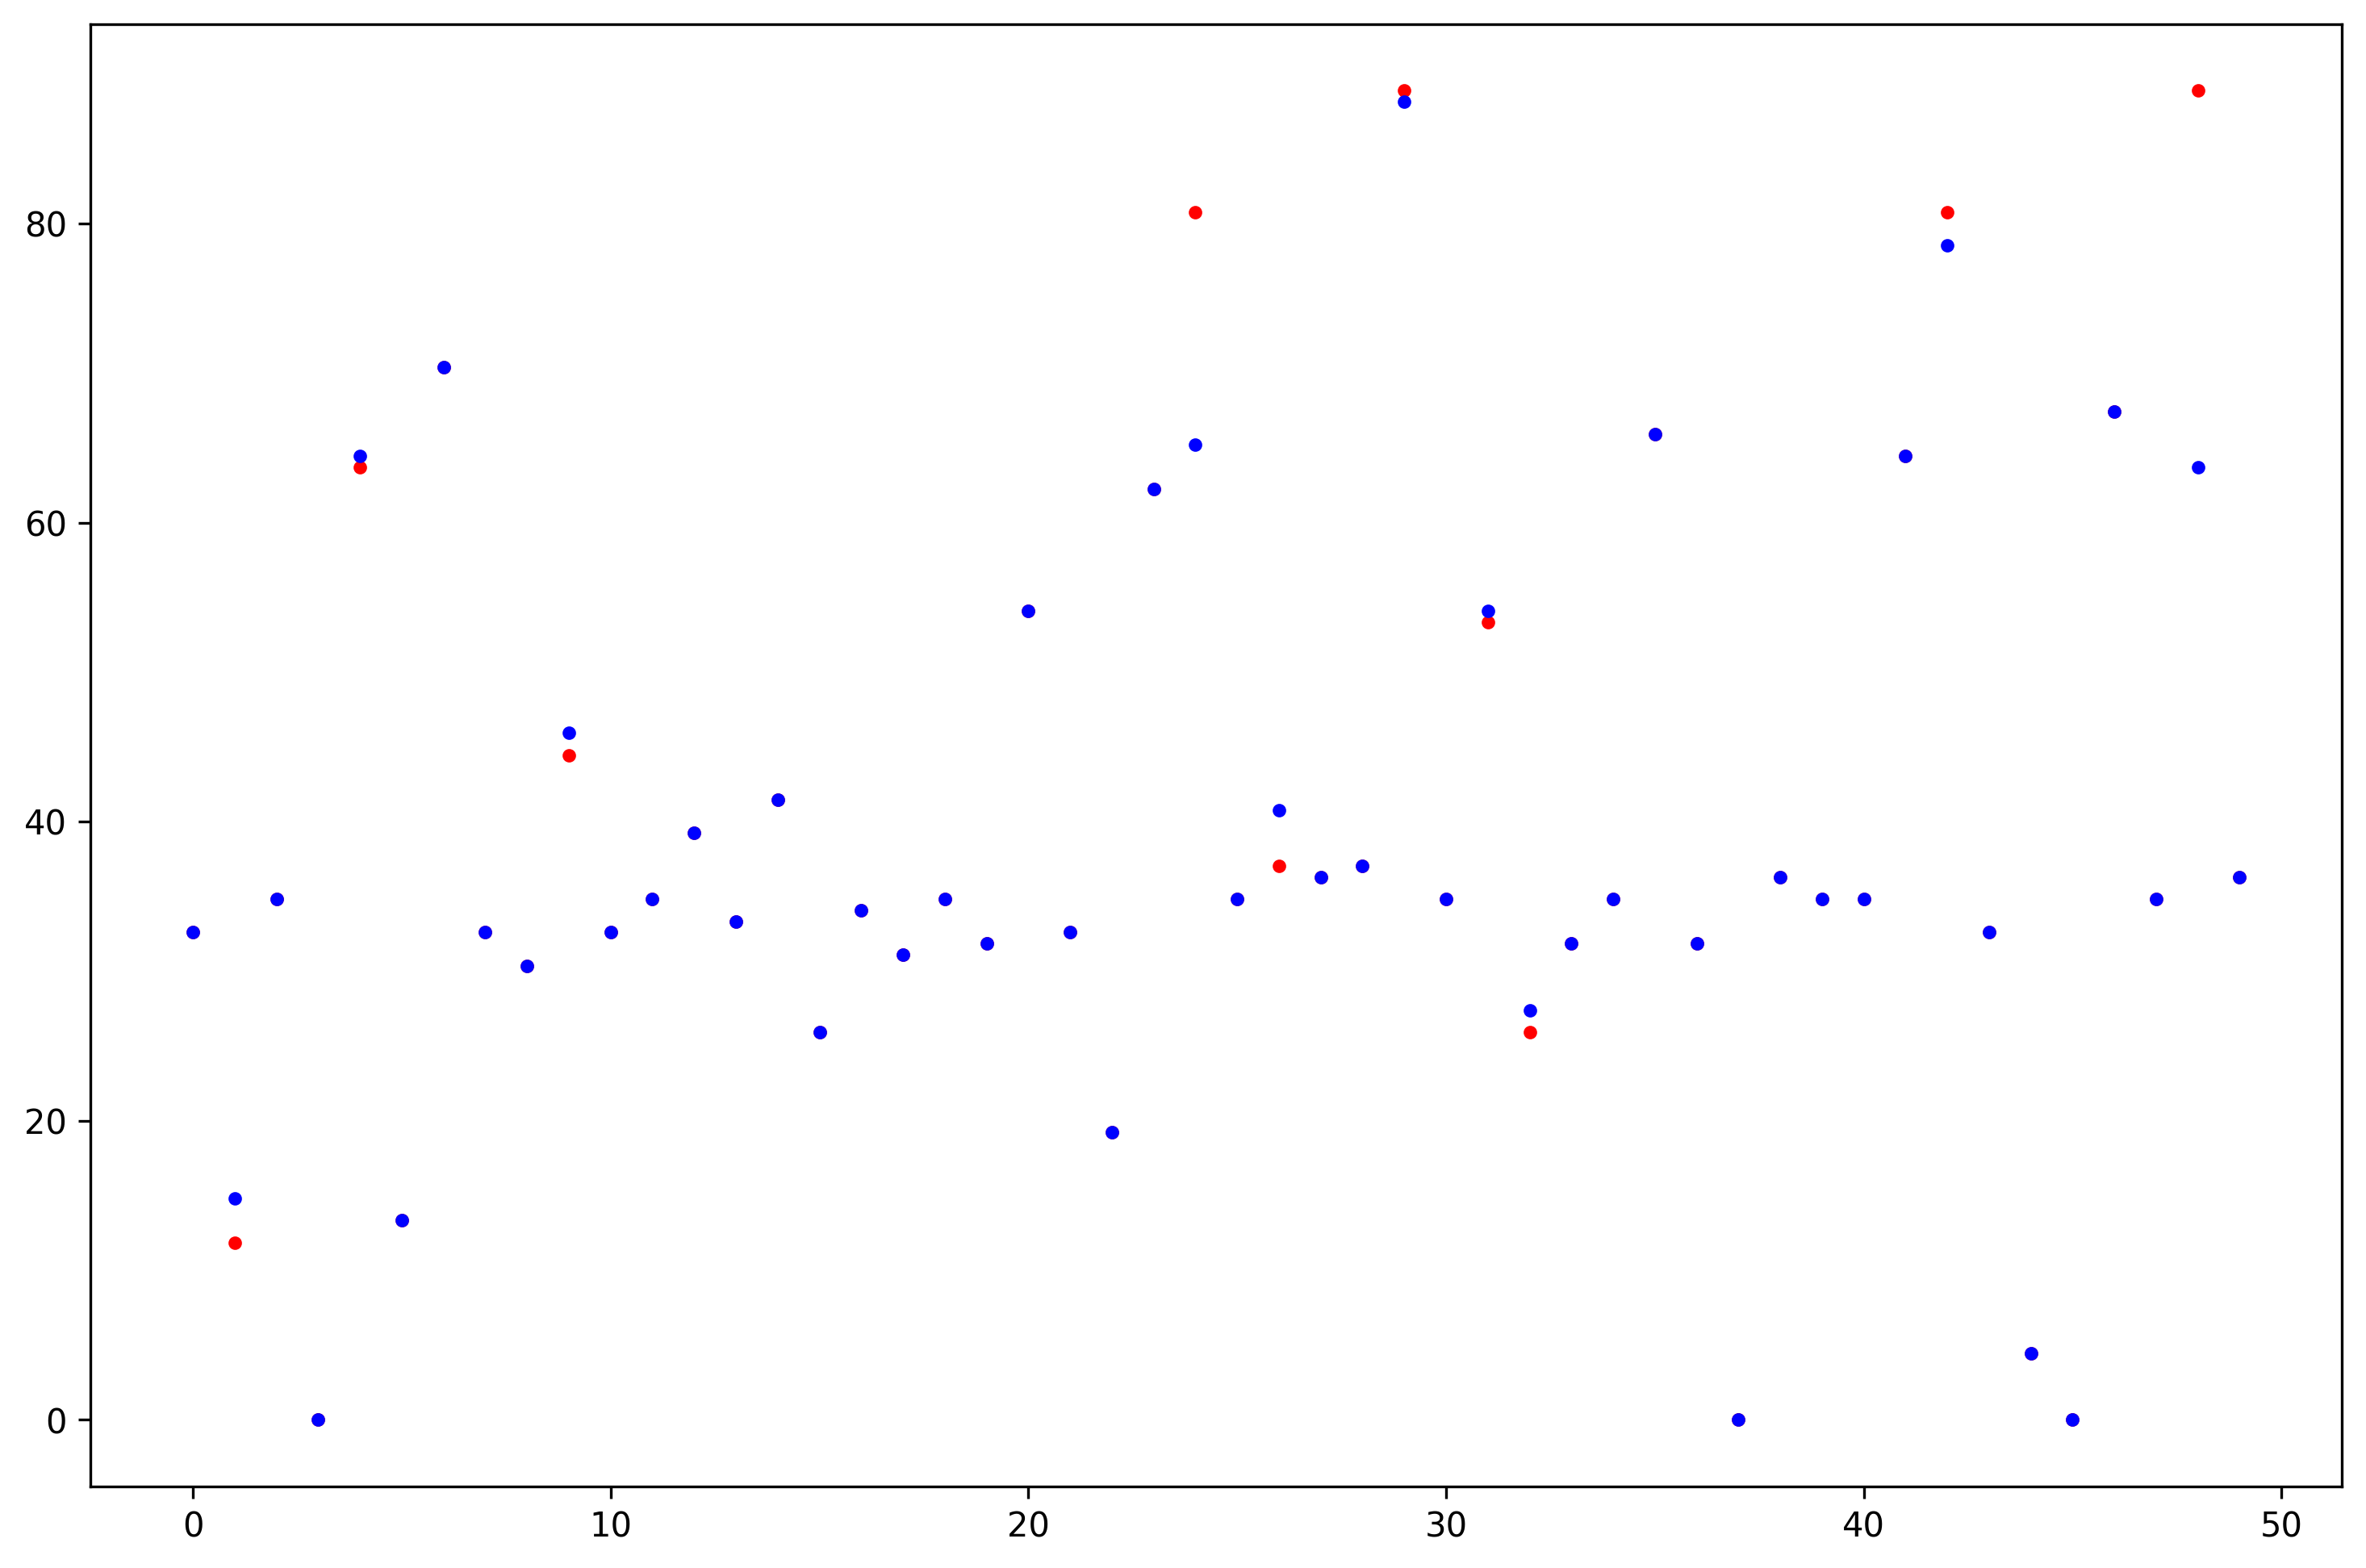

In [248]:
plt.figure(figsize=(12, 8))
plt.gcf().set_dpi(300)
plt.plot(finTrainAccBP, 'r.', label = "BP train acc")
plt.plot(finTrainAccWP, 'b.', label = "WP train acc")


In [247]:
gg = np.array(finTrainAccBP).shape[0]
good = 0
for _ in range(gg):
    if finTrainAccBP[_]<=finTrainAccWP[_]:
        good +=1
print(good/gg)

0.92
